In [48]:
pip install category_encoders



  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ------------------------------ --------- 61.4/81.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 1.2 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\apache_beam-2.53.0-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\contextlib2-21.6.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\cython-3.0.8-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\lvis-0.5.3-py3.11.egg is

In [24]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import category_encoders as ce
import seaborn as sns
import matplotlib
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict, StratifiedShuffleSplit
import pickle

In [25]:
sns.set_theme(palette='tab10',
              font='Microsoft Yi Baiti',
              font_scale=1.5,
              rc=None)
matplotlib.rcParams.update({'font.size': 15})

In [78]:
data = pd.read_csv("predictive_maintenance.csv")
data = data.drop(["UDI", "Product ID"],axis=1)
data.sample(6).style.set_properties(**{
    'background-color' : 'Yellow',
    'color' : 'black',
    'border-color' : 'Black'
})

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
7756,L,300.500000,311.800000,1368,57.900000,191,1,Overstrain Failure
4407,L,302.300000,310.200000,1394,55.400000,57,0,No Failure
7498,M,300.200000,311.800000,1748,28.500000,184,0,No Failure
5536,M,302.300000,311.800000,1363,54.000000,119,1,No Failure
4971,L,303.800000,312.700000,1838,27.800000,181,0,No Failure
952,L,295.500000,306.200000,1448,48.900000,65,0,No Failure


In [70]:
data["Air temperature [K]"] = data["Air temperature [K]"] - 272.15
data["Process temperature [K]"] = data["Process temperature [K]"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
data.rename(columns={"Air temperature [K]" : "Air temperature [C]","Process temperature [K]" : "Process temperature [C]"},inplace=True)

In [71]:
data["Temperature difference []"] = data["Process temperature [C]"] - data["Air temperature [C]"]



In [79]:
data.iloc[7756]

Type                                        L
Air temperature [K]                     300.5
Process temperature [K]                 311.8
Rotational speed [rpm]                   1368
Torque [Nm]                              57.9
Tool wear [min]                           191
Target                                      1
Failure Type               Overstrain Failure
Name: 7756, dtype: object

In [8]:
print(data.shape, data.size)

(10000, 9) 90000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       10000 non-null  object 
 1   Air temperature [C]        10000 non-null  float64
 2   Process temperature [C]    10000 non-null  float64
 3   Rotational speed [rpm]     10000 non-null  int64  
 4   Torque [Nm]                10000 non-null  float64
 5   Tool wear [min]            10000 non-null  int64  
 6   Target                     10000 non-null  int64  
 7   Failure Type               10000 non-null  object 
 8   Temperature difference []  10000 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 703.3+ KB


In [29]:
data.describe()

,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature difference []
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900,10.000630
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094
min,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000,7.600000
25%,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000,9.300000
50%,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000,9.800000
75%,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000,11.000000
max,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000,12.100000


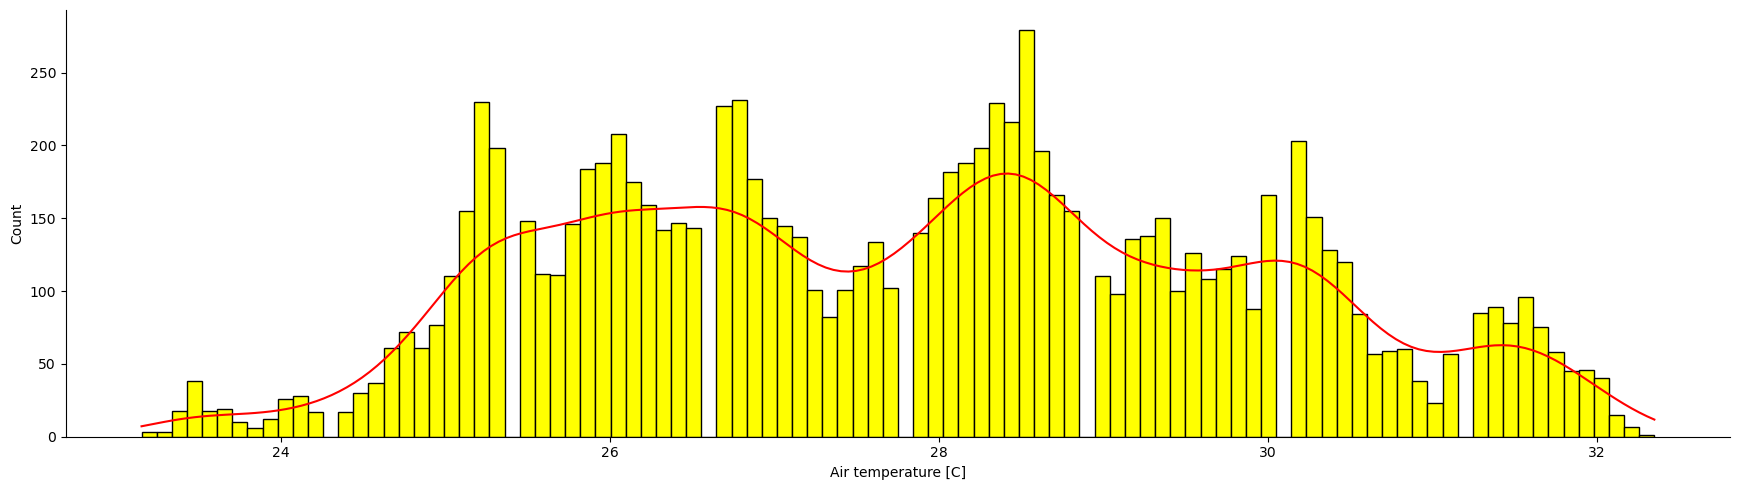

In [11]:
sns.displot(data=data, x="Air temperature [C]", kde=True, bins = 100,color = "red", facecolor = "yellow",height = 5, aspect = 3.5);

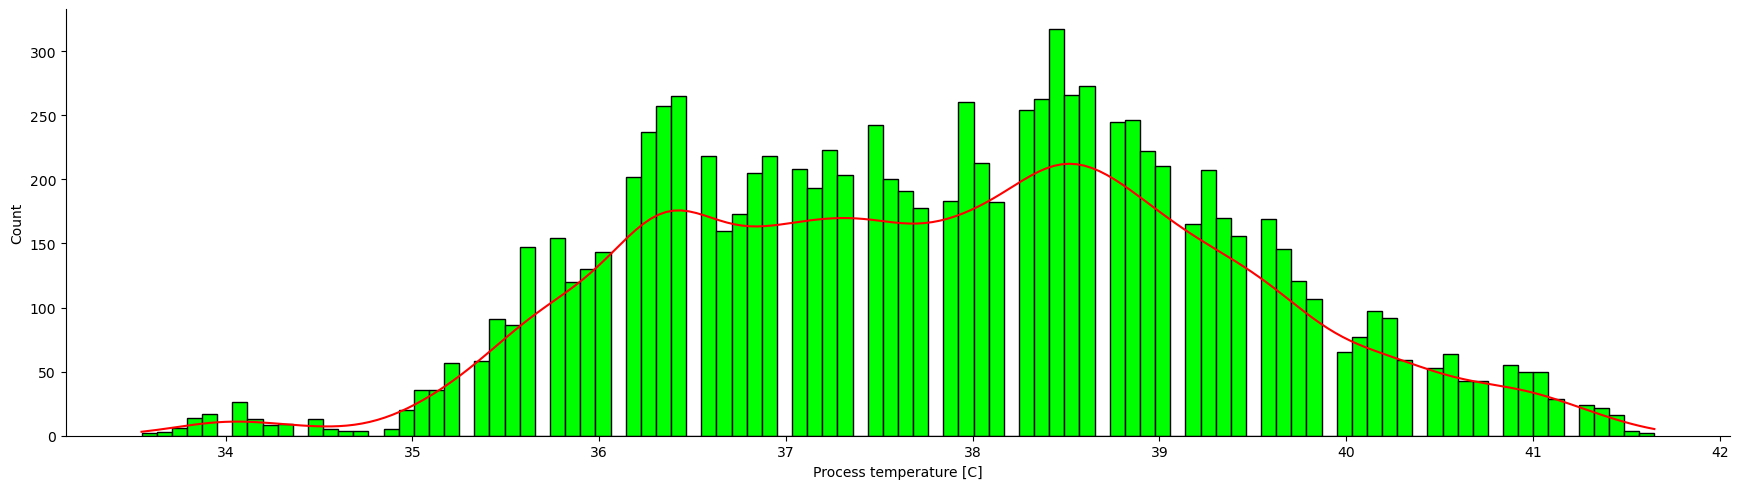

In [12]:
sns.displot(data=data, x="Process temperature [C]", kde=True, bins = 100,color = "red", facecolor = "lime",height = 5, aspect = 3.5);

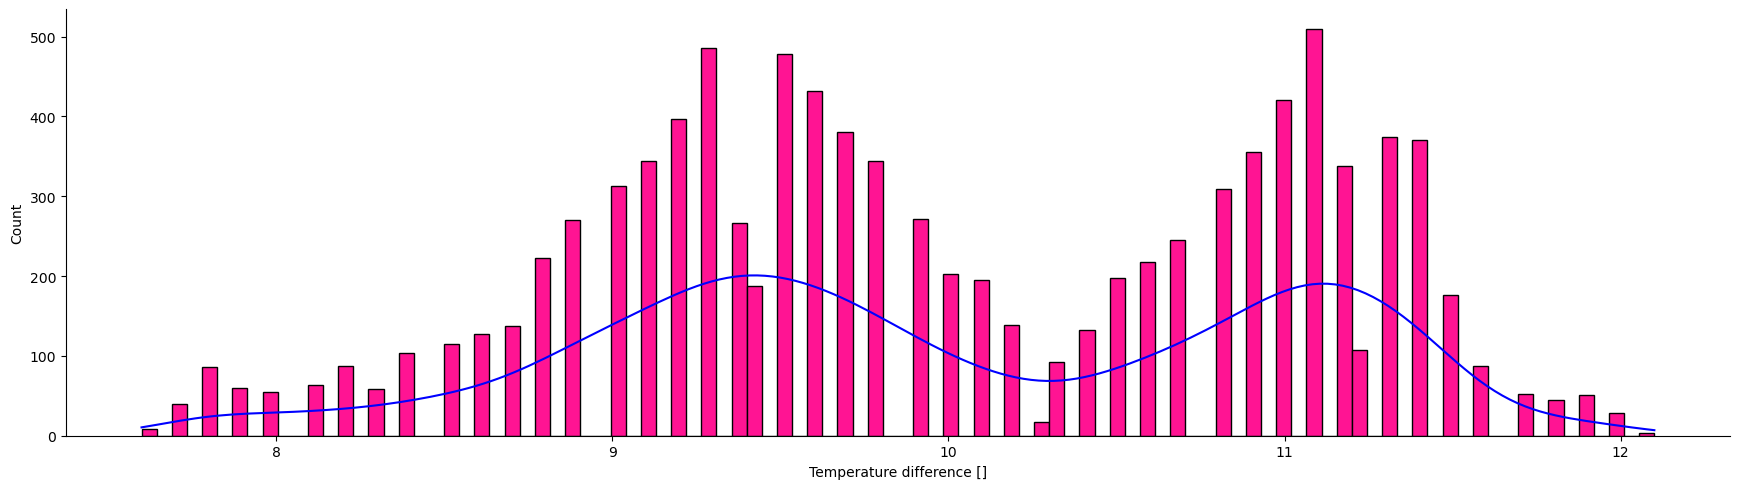

In [13]:
sns.displot(data=data, x="Temperature difference []", kde=True, bins = 100,color = "blue", facecolor = "DeepPink",height = 5, aspect = 3.5);

In [14]:
for col in data[['Type','Target','Failure Type']]:
    print(data[col].value_counts()) 
    print("****"*8)

L    6000
M    2997
H    1003
Name: Type, dtype: int64
********************************
0    9661
1     339
Name: Target, dtype: int64
********************************
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64
********************************


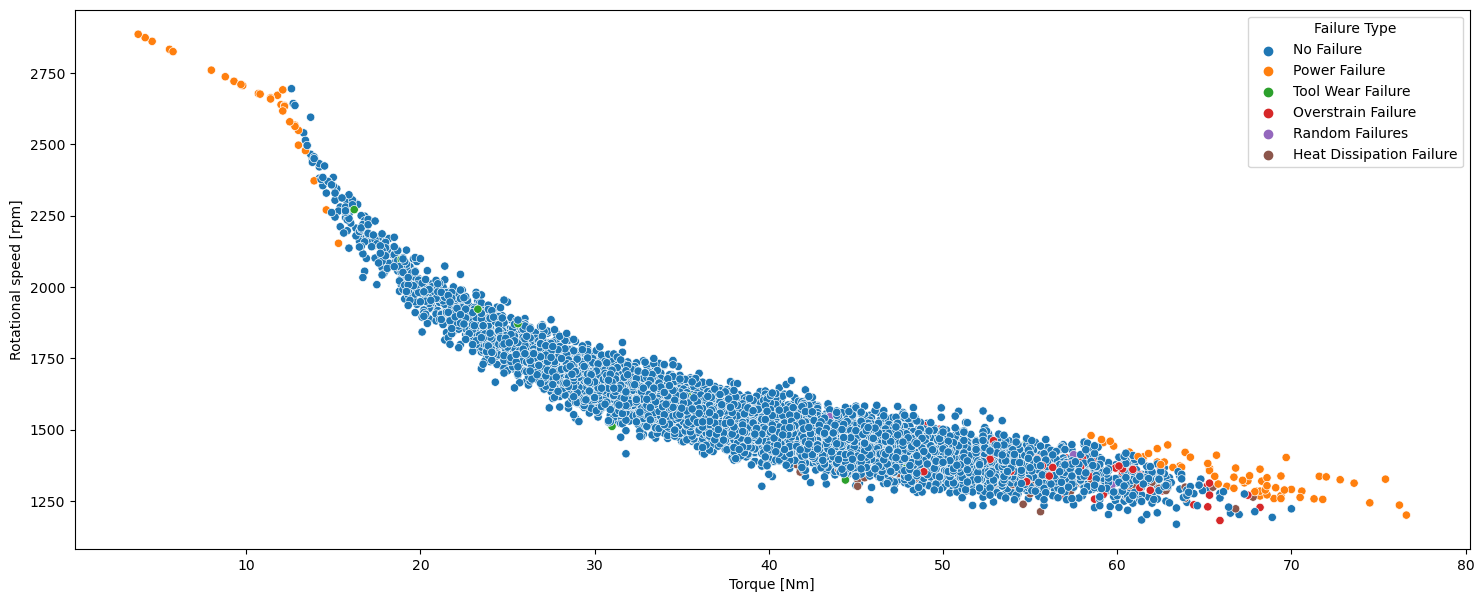

In [15]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=data, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",palette="tab10");

In [80]:
#0 : no fail 1: 2: power failure 3: 4: overstrain failure
encoder = ce.OrdinalEncoder(cols=['Type', 'Failure Type'])
data = encoder.fit_transform(data)
data.head(2)
data.iloc[7756]

Type                          2.0
Air temperature [K]         300.5
Process temperature [K]     311.8
Rotational speed [rpm]     1368.0
Torque [Nm]                  57.9
Tool wear [min]             191.0
Target                        1.0
Failure Type                  4.0
Name: 7756, dtype: float64

In [31]:
scaler = LabelEncoder()
data['Failure Type'] = scaler.fit_transform(data['Failure Type'])

In [52]:
np.random.seed(42)
data1 = data.drop("Temperature difference []", axis=1)
X = data1.drop(columns="Failure Type" , axis=1)
y = data["Failure Type"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [118]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Training Accuracy    : 96.59 %
Model Accuracy Score : 96.8 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1935
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        11
           3       0.29      0.15      0.20        13
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        15

    accuracy                           0.97      2000
   macro avg       0.21      0.19      0.20      2000
weighted avg       0.94      0.97      0.95      2000

--------------------------------------------------------


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


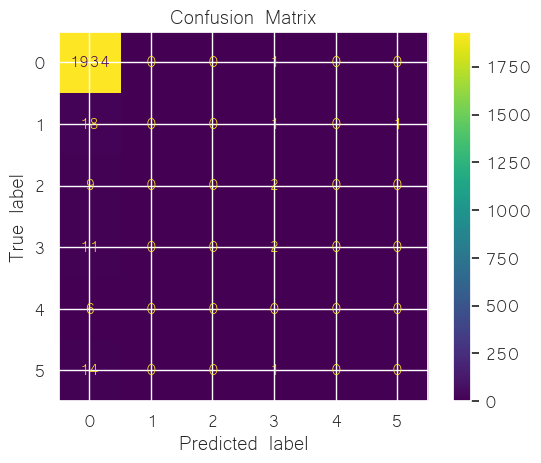

In [119]:
y_pred_lr = clf.predict(X_test)

log_train = round(clf.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.title('Confusion Matrix');
plt.show()

Training Accuracy    : 96.52 %
Model Accuracy Score : 96.8 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1935
           1       1.00      0.05      0.10        20
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        15

    accuracy                           0.97      2000
   macro avg       0.33      0.18      0.18      2000
weighted avg       0.95      0.97      0.95      2000

--------------------------------------------------------


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


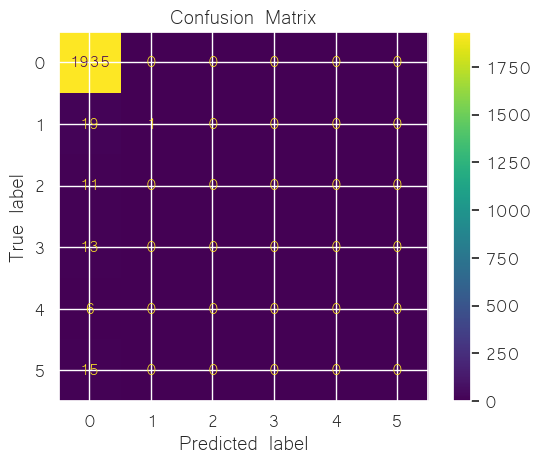

In [85]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.title('Confusion Matrix');
plt.show()

In [120]:
pickle.dump(clf, open('model.pkl', 'wb'))

In [121]:
model = pickle.load(open('model.pkl','rb'))
ye = model.score(X_test, y_test)

In [122]:
data1.iloc[7756]


Type                          2.00
Air temperature [C]          28.35
Process temperature [C]      39.65
Rotational speed [rpm]     1368.00
Torque [Nm]                  57.90
Tool wear [min]             191.00
Failure Type                  3.00
Name: 7756, dtype: float64

In [123]:

col = X.loc[[1, 2000, 2,34,454,7756]]

prediction = model.predict(col)

In [124]:
prediction

array([0, 0, 0, 0, 0, 0], dtype=int64)